#https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook#13.-Predict-the-results-

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns 

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\myProjectC#\adult.csv\adult.csv', header=None)

rawfile = pd.read_csv(r'C:\Users\User\Documents\myProjectC#\adult.csv\adult.csv', header=None,na_values=["?"])

In [3]:
#rename columns

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [4]:
df.columns = col_names

In [5]:
#df["categorical"] = df.select_dtypes(include=['object'])
categorical = [var for var in df.columns if df[var].dtype =='object']


In [6]:
#deal with missing values

In [7]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [8]:
#frequency count of categorical variables
for var in categorical:
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [9]:
#check the frequency distribution of categorical variables
for var in categorical:
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

C:\Users\User\AppData\Local\Temp/ipykernel_12308/1012435557.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


In [10]:
#rawfile['workclass_1'] = rawfile['workclass'].replace('?', np.NaN, inplace=True)

df['workclass']=df['workclass'].replace('\?',np.NaN,regex=True)

In [11]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [13]:
#explore occupation variable

In [14]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [15]:
df['occupation']=df['occupation'].replace('\?',np.NaN,regex=True)

In [16]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
df['native_country'] = df['native_country'].replace('\?',np.NaN, regex=True)

In [18]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [19]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

# #Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality.
A high number of labels within a variable is known as high cardinality.
High cardinality may pose some serious problems in the machine learning model.
So, I will check for high cardinality.


In [20]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [21]:
for var in categorical:
    print(var,'contains',len(df[var].unique()),'labels')

workclass contains 9 labels
education contains 16 labels
marital_status contains 7 labels
occupation contains 15 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native_country contains 42 labels
income contains 2 labels


# find numerical variables

In [22]:
num_columns = df._get_numeric_data().columns

In [23]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [24]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [25]:
numerical = [var for var in df.columns if df[var].dtype != 'object']

In [26]:
print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [27]:
df[numerical]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


# explore problems with numrical variables

In [28]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

# declare train and test sets

In [29]:
X = df.drop(['income'], axis=1)
y = df['income']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [31]:

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# Feature engineering

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 32098 to 2732
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       21516 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education_num   22792 non-null  int64 
 5   marital_status  22792 non-null  object
 6   occupation      21514 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital_gain    22792 non-null  int64 
 11  capital_loss    22792 non-null  int64 
 12  hours_per_week  22792 non-null  int64 
 13  native_country  22378 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.6+ MB


In [33]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

In [34]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [35]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [36]:
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [37]:
X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [38]:
#find missing data columns from categorical variables

for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col,(X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [39]:
# impute missing categorical variables with most frequent value

In [41]:
for df2 in [X_train,X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [67]:
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
22278,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
8950,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
7838,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
16505,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
19140,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines
26405,64,Federal-gov,388594,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,45,United-States
23236,54,Self-emp-inc,304570,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,7688,0,40,United-States
26823,36,Self-emp-not-inc,90159,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States


In [40]:
X_train.isnull().sum()

age                  0
workclass         1276
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     414
dtype: int64

# check missing values in categorical variables in X_train

In [42]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [43]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [44]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

# Encode categorical variables

In [45]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [46]:
X_train[categorical]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany
...,...,...,...,...,...,...,...,...
13123,Local-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
19648,Private,10th,Never-married,Farming-fishing,Unmarried,White,Male,United-States
9845,Private,Some-college,Separated,Sales,Own-child,White,Female,United-States
10799,Local-gov,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [53]:
#import category encoder
import category_encoders as ce

In [55]:
encoder = ce.OneHotEncoder(cols = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country'])

In [56]:
X_train = encoder.fit_transform(X_train)

In [59]:
X_test = encoder.transform(X_test)

KeyError: 'workclass'

In [60]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_train.shape, X_test.shape

((22792, 105), (9769, 105))

# Feature scaling

We now have training and testing set ready for model building.
Before that, we should map all the feature variables onto the same scale.
It is called feature scaling. I will do it as follows.


In [64]:
from sklearn.preprocessing import RobustScaler

In [66]:
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [68]:
X_train = pd.DataFrame(X_train,columns=[cols])

In [69]:
X_test = pd.DataFrame(X_test,columns=[cols])

In [70]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.024137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.476190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.643323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.272747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.380952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.060375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Now data is ready to be fed into Gaussian Naive Bayes classifier.

In [72]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

# Predict the Result

In [75]:
y_pred = gnb.predict(X_test)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [76]:
y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Check Accuracy score

In [77]:
from sklearn.metrics import accuracy_score
print('Model accuracy score:{}'.format(accuracy_score(y_pred,y_test)))

Model accuracy score:0.8060190398198382


# Compare the train-set and test_set accuracy to check Overfitting

In [78]:
y_pred_train = gnb.predict(X_train)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [79]:
print('training set accuracy score:{}'.format(accuracy_score(y_train,y_pred_train)))

training set accuracy score:0.8067304317304317


# Check for overfitting and underfitting

In [82]:
print('training set score:{}'.format(gnb.score(X_train,y_train)))
print('test set score:{}'.format(gnb.score(X_test,y_test)))

training set score:0.8067304317304317
test set score:0.8060190398198382


C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
#The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8060. 
#These two values are quite comparable. So, there is no sign of overfitting.

# Compare model accuracy with Null accuracy
    So, the model accuracy is 0.8083. But, we cannot say that our model is
    very good based on the above accuracy. We must compare it with the null accuracy. 
    Null accuracy is the accuracy that could be 
    achieved by always predicting the most frequent class.

In [ ]:
#check class distribution in test set

In [83]:
y_test.value_counts()

 <=50K    7407
 >50K     2362
Name: income, dtype: int64

we can see the most occurrence is 7407 so we can 
calculate Null accuracy by dividing 7407 by total number of occurences.

In [84]:
#check Null accuracy score
null_accuracy = (7407/(7407+2362))

In [85]:
print('null accuracy:{}'.format(null_accuracy))

null accuracy:0.7582147609786057


Null accuracy score is 0.7583 while model accuracy is 0.8060. So we can conclude that Gaussian Naive baye's classification model
is doing very good job in predicting the class labels.

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5978 1429]
 [ 466 1896]]


In [89]:
#visualize Confusion matrix
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

In [93]:
print(cm_matrix)

                    Actual Positive:1  Actual Negative:0
Predict Positive:1               5978               1429
Predict Negative:0                466               1896


<AxesSubplot:>

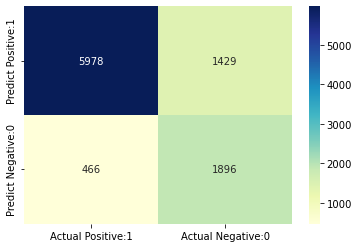

In [94]:
sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

# Classifiaction matrix

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.81      0.82      9769



In [98]:
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

# print classification accuracy
predicted true positive cases/total number of outcomes

In [103]:
classification_accuracy = (tp+tn)/float(tp+tn+fp+fn)
print('class_accuracy:{}'.format(classification_accuracy))

class_accuracy:0.8060190398198382


In [102]:
classification_error = (fp+fn)/float(tp+tn+fp+fn)
print('classification_error:{}'.format(classification_error))

classification_error:0.19398096018016173


# find Precision
precision can be defined as the percentage of correctly predicted +ve outcomes out of all the predicted
positive outcomes.
tp/(tp+fp)

In [104]:
precision = tp/float(tp+fp)
print('precision:{}'.format(precision))

precision:0.8070743890914001


# Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the
actual positive outcomes.


In [105]:
recall = tp/float(tp+fn)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9277


In [ ]:
#f1 score
is the weighted Harmonic mean of precision and recall. The best possible f1-score is 1.0 while the worst is 0.0.

# predict probability of two classes for X_test

In [106]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [107]:
y_pred_prob

array([[9.99999402e-01, 5.97726033e-07],
       [9.99741558e-01, 2.58442035e-04],
       [1.68415743e-01, 8.31584257e-01],
       [9.36605298e-05, 9.99906339e-01],
       [6.43898109e-09, 9.99999994e-01],
       [8.96765082e-01, 1.03234918e-01],
       [9.99999921e-01, 7.88422887e-08],
       [9.99993401e-01, 6.59867386e-06],
       [9.88525360e-01, 1.14746404e-02],
       [9.99999996e-01, 4.40105565e-09]])

In [108]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

In [109]:
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.977260e-07
1,9.997416e-01,2.584420e-04
2,1.684157e-01,8.315843e-01
3,9.366053e-05,9.999063e-01
4,6.438981e-09,1.000000e+00
5,8.967651e-01,1.032349e-01
6,9.999999e-01,7.884229e-08
7,9.999934e-01,6.598674e-06
8,9.885254e-01,1.147464e-02
9,1.000000e+00,4.401056e-09


In [110]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10,1]

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([5.97726033e-07, 2.58442035e-04, 8.31584257e-01, 9.99906339e-01,
       9.99999994e-01, 1.03234918e-01, 7.88422887e-08, 6.59867386e-06,
       1.14746404e-02, 4.40105565e-09])

In [112]:
#store class 1 probability as > 50k
y_pred_1 = gnb.predict_proba(X_test)[:,1]
print(y_pred_1)

[5.97726033e-07 2.58442035e-04 8.31584257e-01 ... 1.00000000e+00
 8.26014926e-03 1.12877654e-06]


C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Frequency')

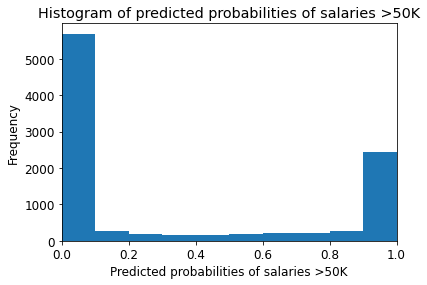

In [114]:
#plot Histogram of predicted probability
plt.rcParams['font.size'] = 12
plt.hist(y_pred_1,bins=10)
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)

plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [115]:
#find True positive rate and false positive rate
true_positive_rate = tp/float(tp+fn)
print('True positive rate:{}'.format(true_positive_rate))

True positive rate:0.9276846679081316


In [116]:
false_positive_rate = fp/float(fp+tn)
print('false_positive_rate',false_positive_rate)

false_positive_rate 0.4297744360902256


# ROC curve
classification model performance. ROC curve plots true positive rate vs false positive rate at various threshold value.

C:\Users\User\miniconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


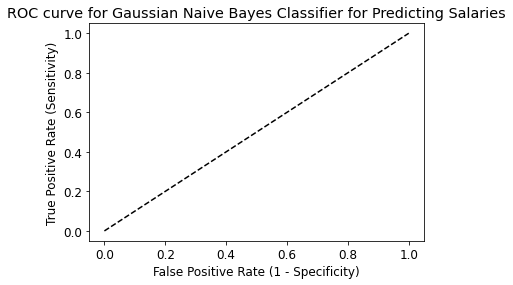

In [118]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#ROC AUC
receiver operating charactersitic - area under curve. It is a technique to compare classifier performance.
In this technique, we measure the area under the curve (AUC)

In [119]:
from sklearn.metrics import roc_auc_score

In [120]:
ROC_AUC = roc_auc_score(y_test,y_pred_1)

In [121]:
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8932


# calculate cross-validated ROC AUC 

In [122]:
from sklearn.model_selection import cross_val_score

In [123]:
Cross_validated_ROC_AUC = cross_val_score(gnb,X_train,y_train,cv=5,scoring='roc_auc').mean()

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklea

In [124]:
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8938


# K-Fold cross validation

In [125]:
#apply 10 fold cross validation

from sklearn.model_selection import cross_val_score

In [126]:
scores = cross_val_score(gnb,X_train,y_train,cv=10,scoring='accuracy')

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\User\miniconda3\lib\site-packages\sklea

In [127]:
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]


In [128]:
#We can summarize the cross-validation accuracy by calculating its mean.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8063


original model accuracy:0.806 while cross validation acc is 0.806. so there is no improvement in the performance.

# result

In [ ]:

    In this project, 
    1.I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8083.
    The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083.
    These two values are quite comparable. So, there is no sign of overfitting.
    
    2. I have compared the model accuracy score which is 0.8063 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.
    ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.
    3. Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.
    4.If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.59% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
    5.Our original model accuracy is 0.8060, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.
